## Decision Trees
---

#### Decision Trees (DTs) are a 
### non-parametric (does not assume a fixed form for the data distribution (like Gaussian, linear, etc.)
### supervised learning method 
### used for classification and regression. 
#### The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

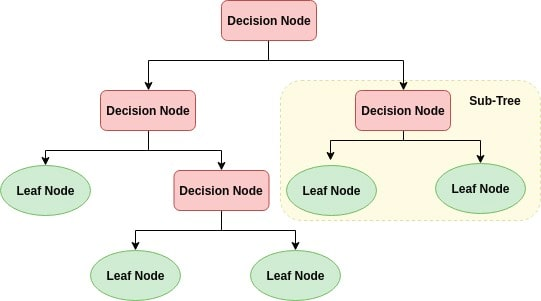

---

### How Does the Decision Tree Algorithm Work?
The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures (ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Start tree building by repeating this process recursively for each child until one of the conditions will match:

       - All the tuples belong to the same attribute value.
       - There are no more remaining attributes.
       - There are no more instances.

 AMA's - Information Gain, Gain Ratio, Gini index 
    
---
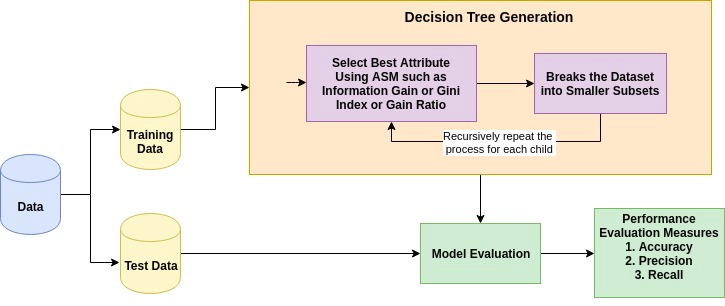

---

#### Advantages

- Interpretable and visualizable.

- Requires minimal preprocessing (no normalization or dummy encoding).

- Handles numeric inputs; categorical support is limited.

- Fast prediction (logarithmic time per sample).

- Supports multi-output tasks.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import torch

print("Environment ready for ML!")
print(f"PyTorch version: {torch.__version__}")


Environment ready for ML!
PyTorch version: 2.8.0+cpu


### Importing Required Libraries

In [6]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Loading Data

In [27]:
# raw csv data
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
pima = pd.read_csv(url)


In [28]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Feature Selection

In [29]:

# split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = pima[feature_cols]  # Features
y = pima.Outcome  # Target variable

### Splitting Data

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.


In [30]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test|

In [31]:
X_test = X_test[X_train.columns]

print(X_train.shape, X_test.shape)
print(X_train.columns, X_test.columns)


(537, 7) (231, 7)
Index(['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure',
       'DiabetesPedigreeFunction'],
      dtype='object') Index(['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure',
       'DiabetesPedigreeFunction'],
      dtype='object')


#### Building Decision Tree Model

In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


### Evaluating Model


Accuracy can be computed by comparing actual test set values and predicted values.

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7056277056277056


### Visualizing Decision Trees

You can use Scikit-learn's `plot_tree` function from the tree module to display the tree within a Jupyter notebook. 

Accuracy: 0.7056277056277056


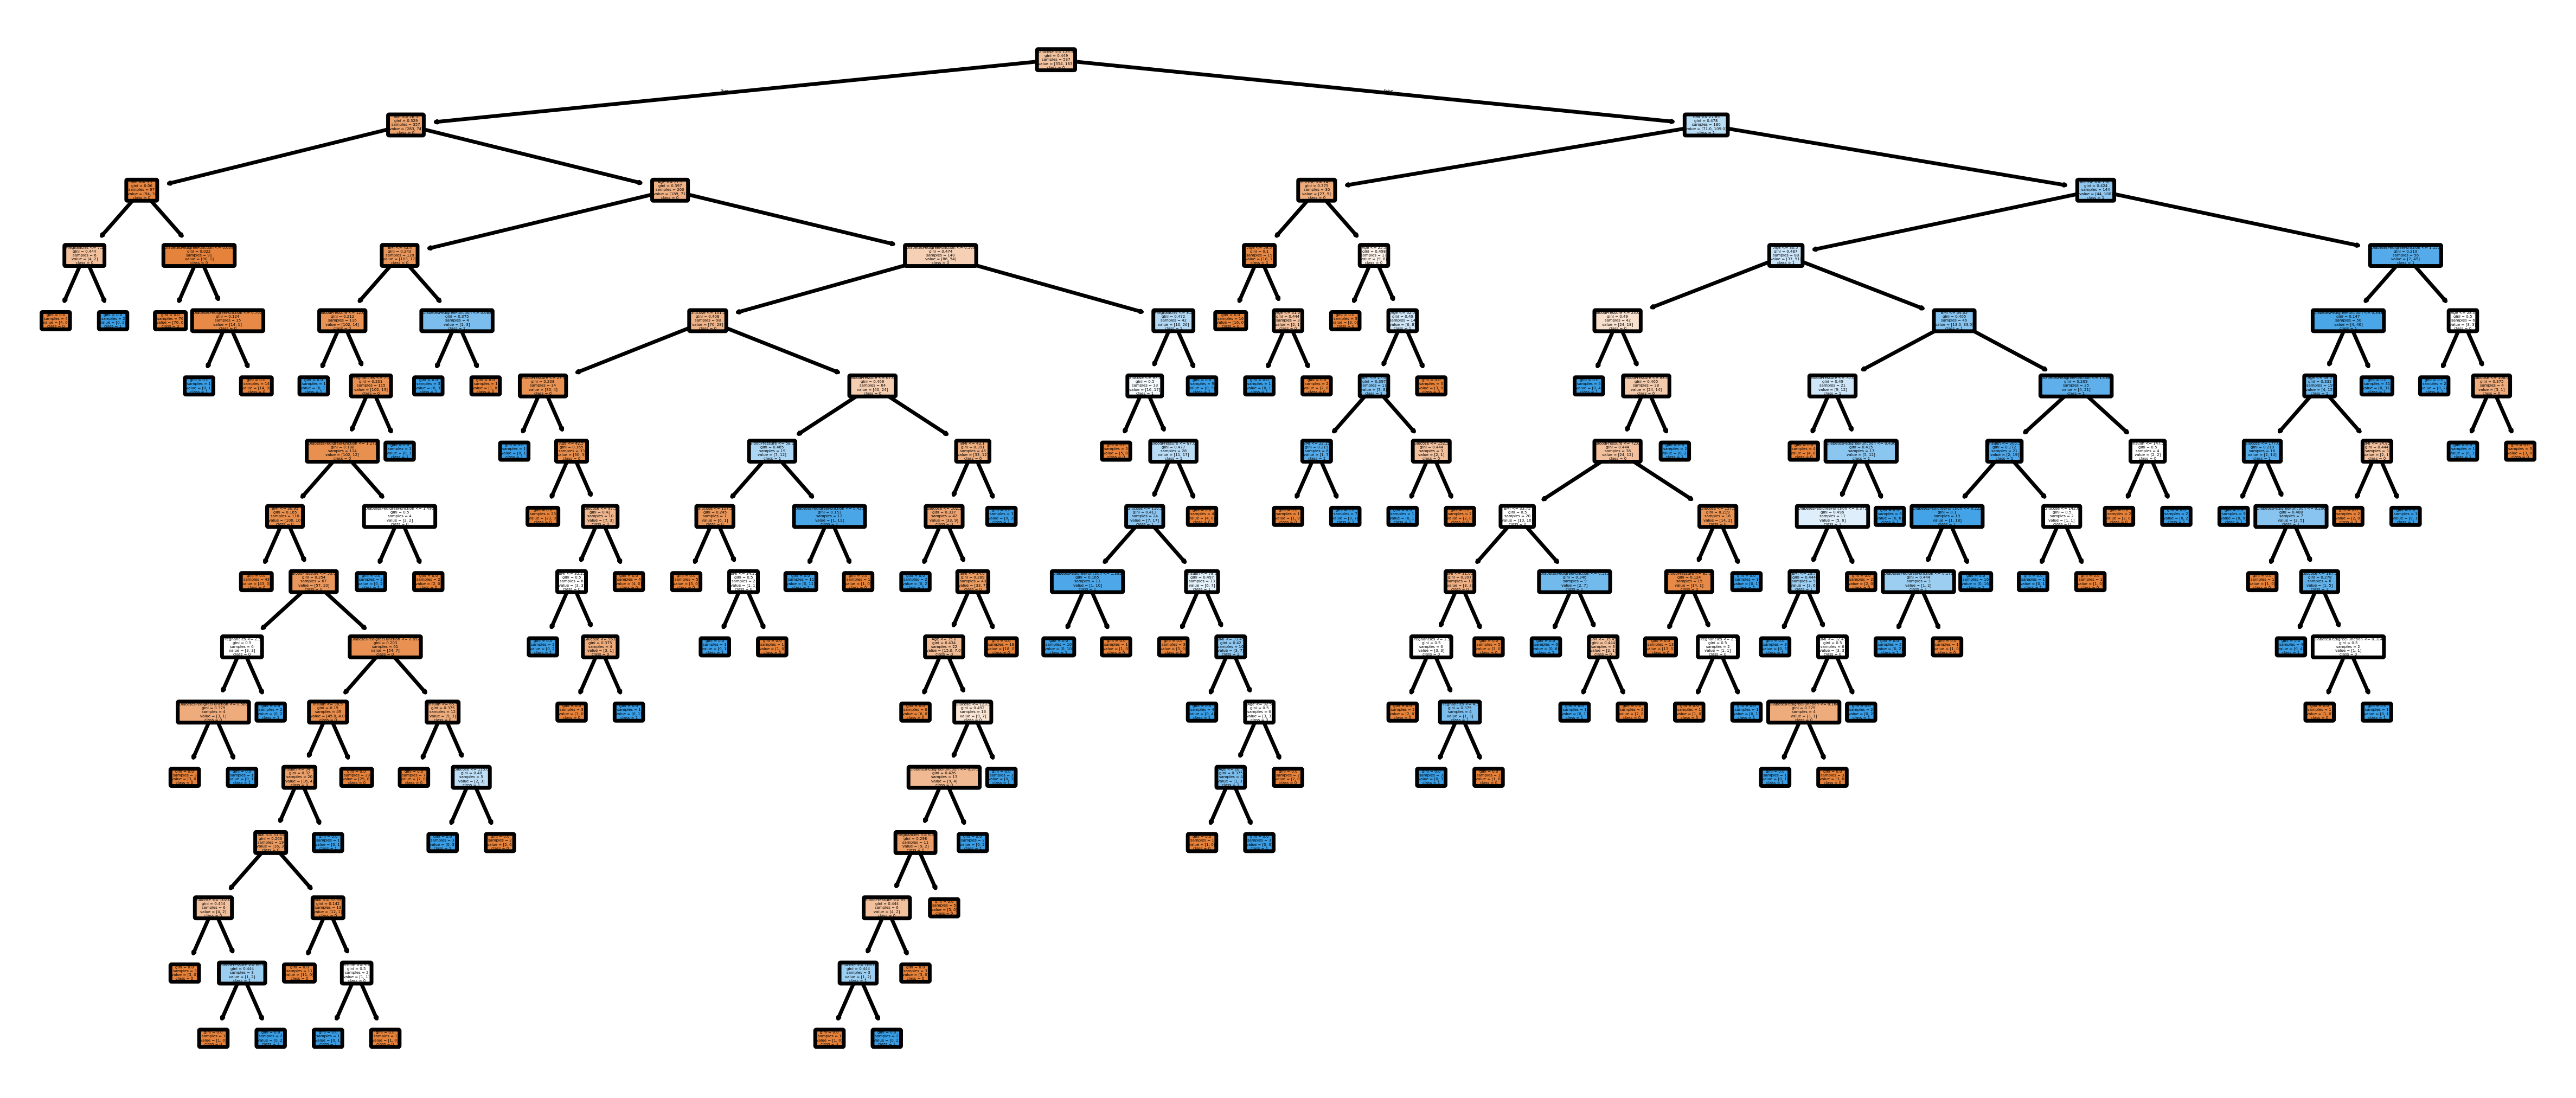

In [37]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.savefig('decision_tree.png')

---

## Optimizing Decision Tree Performance

- **criterion :  optional (default=”gini”) or Choose attribute selection measure**: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- **splitter : string, optional (default=”best”) or Split Strategy**: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- **max_depth : int or None, optional (default=None) or Maximum Depth of a Tree**: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting ([Source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3.  Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

---



In [41]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


Accuracy: 0.7705627705627706


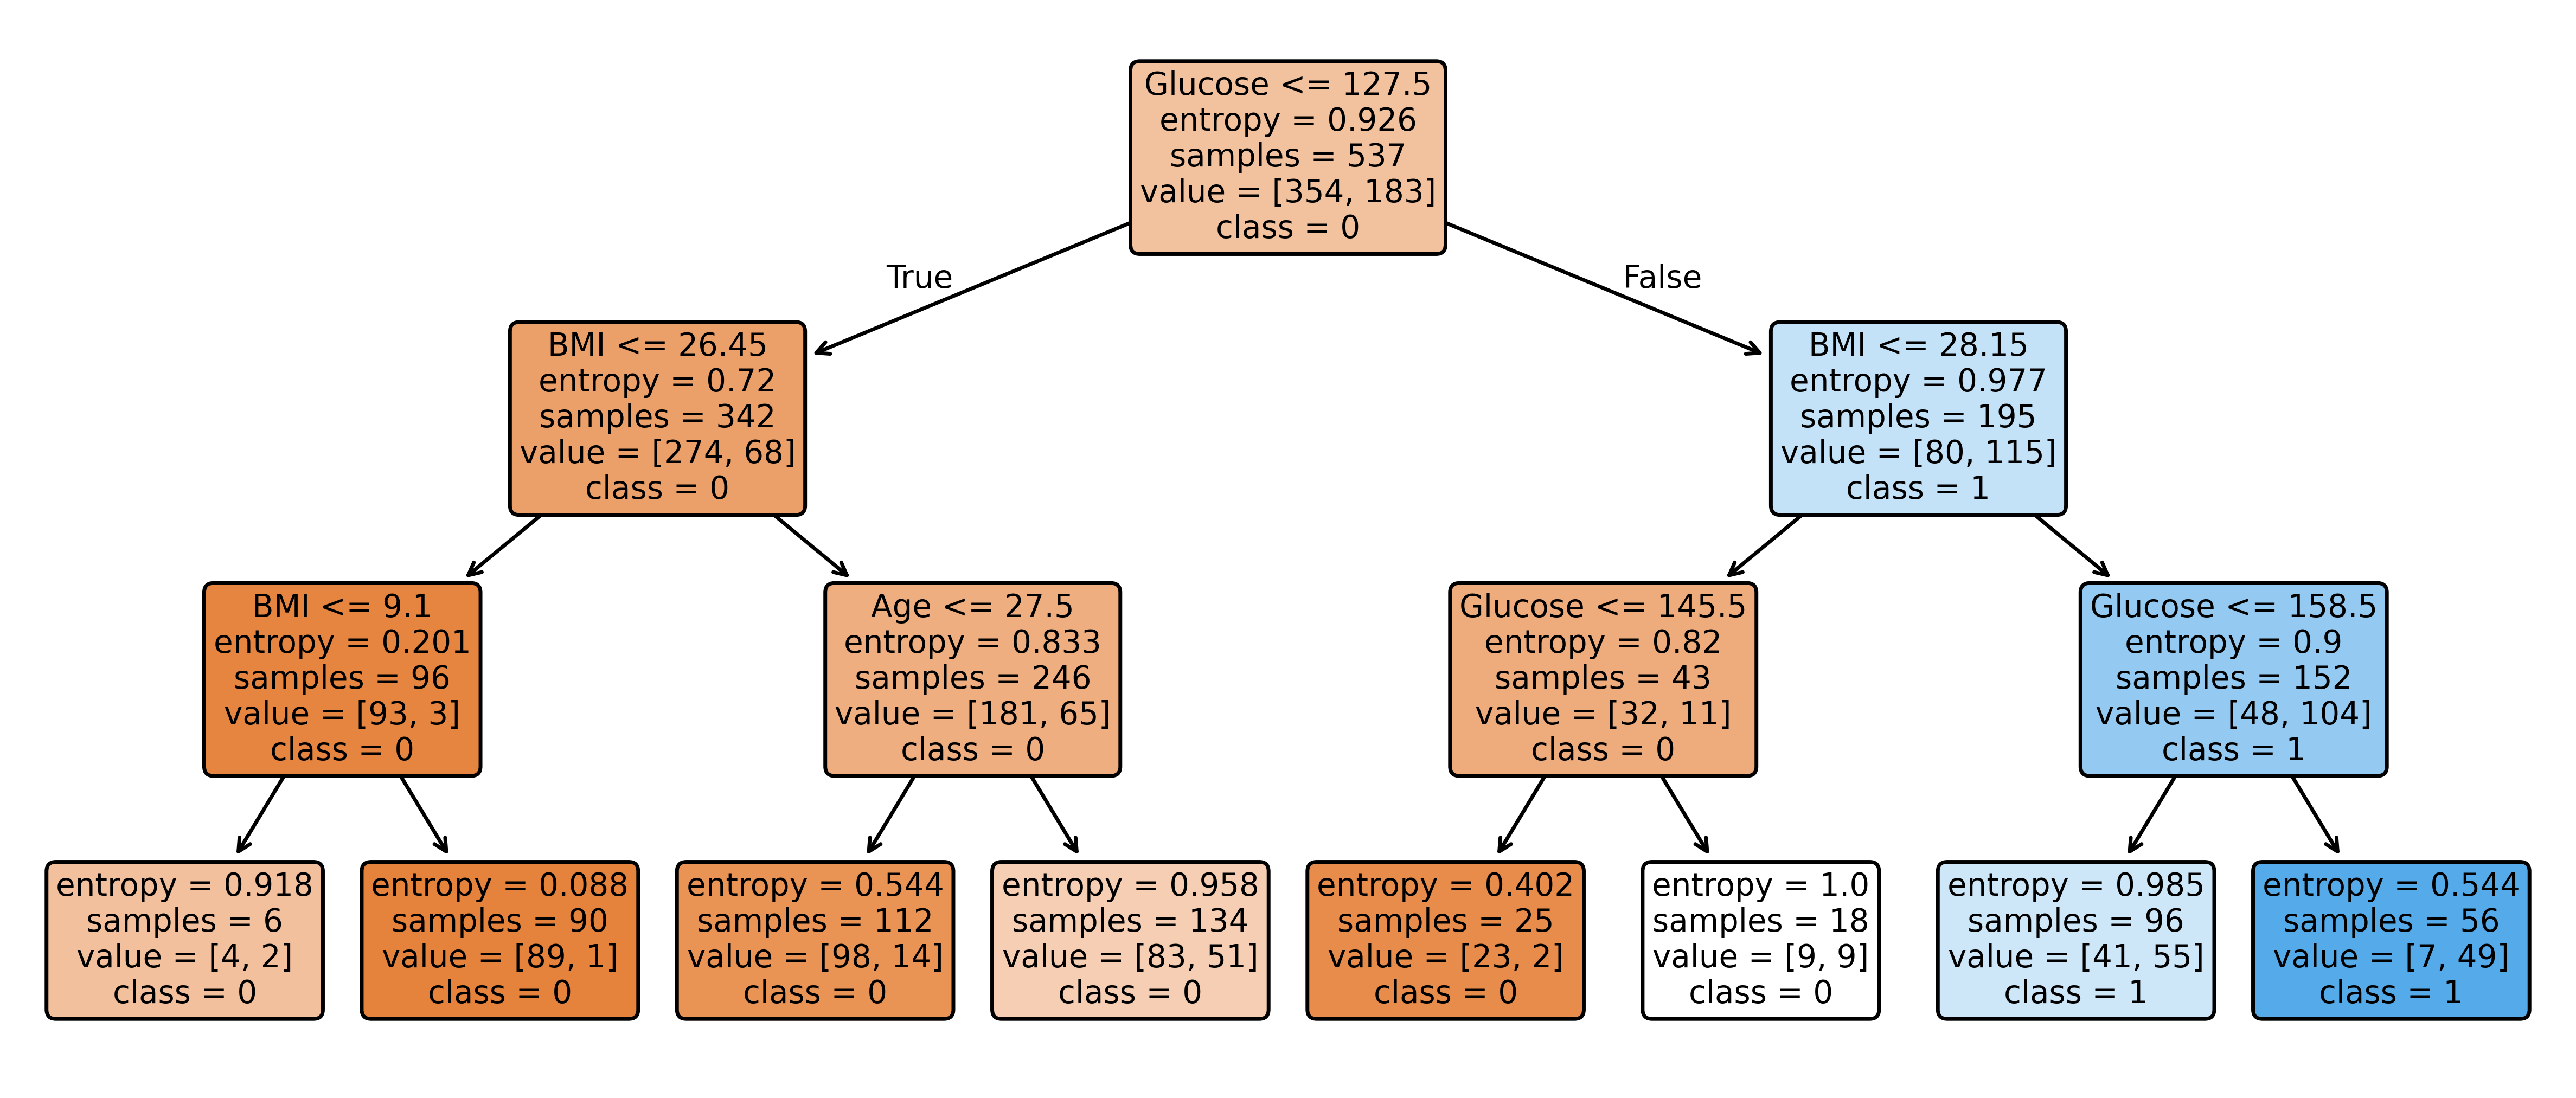

In [42]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
plt.savefig('decision_tree.png')

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

## Pros

- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.
([Source](https://scikit-learn.org/stable/modules/tree.html))

## Cons

- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

## Conclusion
In this tutorial, you covered a lot of details about Decision Tree; It's working, attribute selection measures such as Information Gain, Gain Ratio, and Gini Index, decision tree model building, visualization and evaluation on diabetes dataset using Python Scikit-learn package. Also, discussed its pros, cons, and optimizing Decision Tree performance using parameter tuning.

Hopefully, you can now utilize the Decision tree algorithm to analyze your own datasets.


## References:

https://www.datacamp.com/tutorial/decision-tree-classification-python

https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

In [63]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Create Random Forest classifier object
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=6)

# Train Random Forest Classifier
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Random Forest Accuracy:", metrics.accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.8051948051948052


In [65]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6
                            )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7619047619047619
